Nombres: Yessica Sughey Cantú Moron
Jean Carlos Javier Rubio Camarillo
Angel Fernando Contreras García
Edwin Osbaldo Sánchez Guzmán
Hugo Andriy Sánchez Ramírez
Hora Clase: N4    Inteligencia Artificial y Redes Neuronales

In [ ]:
!pip install kaggle
!pip install tensorflow
!pip install matplotlib

In [66]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"andriysanchez","key":"3fc01a24ee78304eee7a99e857e9d09c"}'}

In [74]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d niteshfre/chessman-image-dataset
!unzip chessman-image-dataset.zip -d chessman_data

In [82]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Ruta donde se encuentran las imágenes descomprimidas
data_dir = "chessman_data/Chessman-image-dataset/Chess"

# Crear datasets de entrenamiento y validación
train_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(150, 150),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150, 150),
    batch_size=32
)

# Normalizar los valores de los píxeles
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 552 files belonging to 6 classes.
Using 442 files for training.
Found 552 files belonging to 6 classes.
Using 110 files for validation.


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')  # Hay 6 clases de piezas de ajedrez
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Entrenar el modelo
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20
)


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_69 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_70 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_70 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_71 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_71 (MaxPooli  (None, 17, 17, 128)     

In [87]:
loss, accuracy = model.evaluate(validation_dataset)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

4/4 [==============================] - 2s 298ms/step - loss: 4.9842 - accuracy: 0.3909
Loss: 4.98416805267334
Accuracy: 0.3909091055393219


1/1 [==============================] - 0s 94ms/step


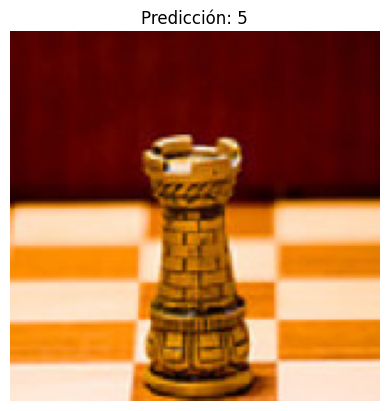

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Función para predecir y mostrar una imagen
def predict_and_show(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, 0) / 255.0  # Crear un batch de un solo elemento

    # Hacer una predicción
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    # Mostrar la imagen y la predicción
    plt.imshow(img)
    plt.title(f'Predicción: {predicted_class}')
    plt.axis('off')
    plt.show()

# Ejemplo de uso
predict_and_show('chessman_data/Chessman-image-dataset/Chess/Rook/00000086.jpg')  # Cambia esta ruta a una imagen de prueba